In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df =pd.read_csv("ACCIDENTS_GU_BCN_2013.csv",encoding='unicode_escape')
df.head()

,Número d'expedient,Codi districte,Nom districte,NK barri,Nom barri,Codi carrer,Nom carrer,Num postal caption,Descripció dia setmana,Dia de setmana,...,Hora de dia,Descripció torn,Descripció causa vianant,Número de morts,Número de lesionats lleus,Número de lesionats greus,Número de víctimes,Número de vehicles implicats,Coordenada UTM (Y),Coordenada UTM (X)
0,2013S007360,-1,Desconegut,1,Desconegut,-1,Desconegut,Desconegut,Dimecres,3,...,21,Tarda,Desconegut,0,1,0,1,2,-1,-1
1,2013S007723,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,152600,Guinardó,0028 0032,Dimarts,2,...,21,Tarda,Desconegut,0,1,0,1,2,"4585218,67","431621,41"
2,2013S005373,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,134801,Freser,0053 0053,Dimarts,2,...,10,Matí,Creuar per fora pas de vianants,0,1,0,1,1,"4585049,89","431605,09"
3,2013S001486,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,161407,Indústria,0224 0224,Dimarts,2,...,10,Matí,Altres,0,1,0,1,1,"4584836,20","431302,26"
4,2013S008254,10,Sant Martí,101-10-64,el Camp de l'Arpa del Clot,161101,Independència,0357 0357,Dilluns,1,...,16,Tarda,Desconegut,0,1,0,1,2,"4584704,26","431385,76"


In [6]:
df.shape

(9457, 25)

In [7]:
df.columns

Index(['Número d'expedient', 'Codi districte', 'Nom districte', 'NK barri',
       'Nom barri', 'Codi carrer', 'Nom carrer', 'Num postal caption',
       'Descripció dia setmana', 'Dia de setmana', 'Descripció tipus dia',
       'NK Any', 'Mes de any', 'Nom mes', 'Dia de mes', 'Hora de dia',
       'Descripció torn', 'Descripció causa vianant', 'Número de morts',
       'Número de lesionats lleus', 'Número de lesionats greus',
       'Número de víctimes', 'Número de vehicles implicats',
       'Coordenada UTM (Y)', 'Coordenada UTM (X)'],
      dtype='object')

In [8]:
from matplotlib import cm
import math
import random


In [19]:
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
# plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('font', size=12) 

In [11]:
df['Date']='2013-'+df['Mes de any'].apply(lambda x: str(x))+'-'+df['Dia de mes'].apply(lambda x:str(x))

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
accidents = df.groupby(['Date']).size()
accidents.mean()

25.90958904109589

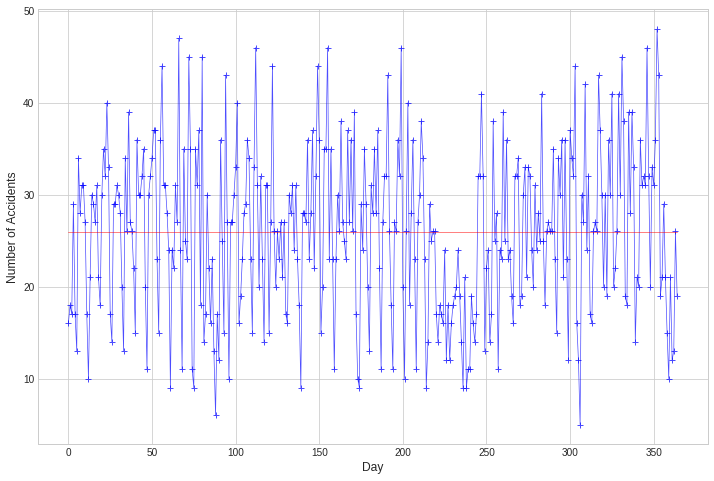

In [20]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
plt.ylabel('Number of Accidents')
plt.xlabel('Day')
plt.plot(range(0,365),np.array(accidents) ,'b-+',lw=0.7,alpha=0.7)
plt.plot(range(0,365),[accidents.mean()]*365 ,'r-',lw=0.7,alpha=0.7)

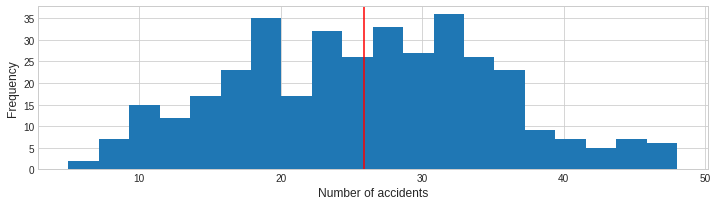

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
plt.ylabel('Frequency')
plt.xlabel('Number of accidents')
plt.hist(np.array(accidents), bins=20)
ax.axvline(x=accidents.mean(), ymin=0, ymax=40, color=[1, 0, 0])
plt.show()

In [22]:
print ("Mean:", accidents.mean(), "; STD:", accidents.std())

Mean: 25.90958904109589 ; STD: 9.108324962464705


In [24]:
df = accidents.to_frame()
m = []

for i in range(10):
    df['for_testing'] = False
    # get a 25% sample 
    sampled_ids = np.random.choice(df.index,
                                   size=np.int64(np.ceil(df.index.size * 0.25)),
                                   replace=False)
    df.loc[sampled_ids, 'for_testing'] = True
    accidents_sample = df[df['for_testing'] == True]
    m.append(accidents_sample[0].mean())
    print  ('Sample '+str(i)+': Mean', '%.2f' % accidents_sample[0].mean())

Sample 0: Mean 27.46
Sample 1: Mean 26.34
Sample 2: Mean 27.00
Sample 3: Mean 27.30
Sample 4: Mean 26.15
Sample 5: Mean 26.34
Sample 6: Mean 25.01
Sample 7: Mean 26.27
Sample 8: Mean 26.13
Sample 9: Mean 25.86


Text(0.5, 0, 'Sample')

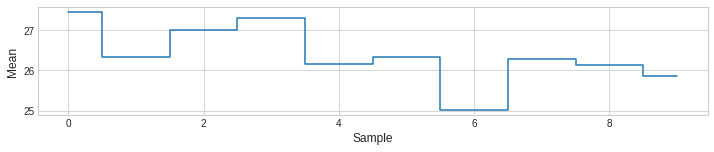

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
x = range(10)
ax.step(x,m, where='mid')
ax.set_ylabel('Mean')
ax.set_xlabel('Sample')

<Figure size 432x288 with 0 Axes>

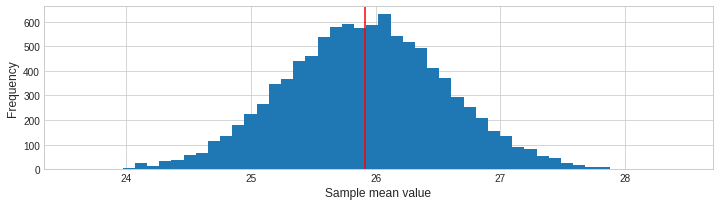

Sample mean: 25.912419999999997


<Figure size 432x288 with 0 Axes>

In [27]:
plt.autumn()

# population
df = accidents.to_frame()    
N_test = 10000              
elements = 200             

# mean array of samples
means = [0] * N_test             

# sample generation
for i in range(N_test):          
    rows = np.random.choice(df.index.values, elements)
    sampled_df = df.loc[rows]
    means[i] = sampled_df.mean()
    
fig, ax = plt.subplots(1, 1, figsize=(12,3))

plt.hist(np.array(means),bins=50)
plt.ylabel('Frequency')
plt.xlabel('Sample mean value')
ax.axvline(x = np.array(means).mean(), 
           ymin = 0, 
           ymax = 700, 
           color = [1, 0, 0])
plt.savefig("empiricalmean.png",dpi=300, bbox_inches='tight')
plt.show()
plt.set_cmap(cmap=cm.Pastel2)

print ("Sample mean:", np.array(means).mean())

In [44]:
rows = np.random.choice(df.index.values,200)
sampled_df = df.loc[rows]
means[i] = sampled_df.mean()
est_sigma_mean = sampled_df.std()/math.sqrt(200)
print("Direct est of SE from one sample of 200 elements:",est_sigma_mean[0])

Direct est of SE from one sample of 200 elements: 0.7129257962472487


In [45]:
print("Est of SE from by simulating 1000 samples of 200 elements:",np.array(means).std())

Est of SE from by simulating 1000 samples of 200 elements: 0.6452364101302328


In [46]:
def meanBootstrap(X,numberb):
    x = [0]*numberb
    for i in range(numberb):
        sample = [X[_] for _ in np.random.randint(len(X), size=len(X))]
        x[i] = np.mean(sample)
    return x

m = meanBootstrap(accidents, 10000)
print ("Mean estimate:", np.mean(m))

Mean estimate: 25.906061369863014


In [47]:
m = accidents.mean()
se = accidents.std()/math.sqrt(len(accidents))
ci = [m - se*1.96, m + se*1.96]
print ("Confidence interval:", ci)

Confidence interval: [24.975156065800284, 26.8440220163915]


In [50]:
m = meanBootstrap(accidents, 10000)
sample_mean = np.mean(m)
sample_se =  np.std(m)

print ("Mean estimate:", sample_mean)
print ("SE of the estimate:", sample_se)

ci = [np.percentile(m,2.5), np.percentile(m,97.5)]
print ("Confidence interval:", ci)

#25.915502
# 0.47856817
# [24.9726 , 26.863082]

Mean estimate: 25.90487260273973
SE of the estimate: 0.4763100628212994
Confidence interval: [24.983561643835618, 26.84664383561644]
